In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import numpy as np

In [2]:
import json

# Experiment:
# ResNet18 + CIFAR100

# Objective:
# set up baseline for our method
# 
# Should have summary of the weekly progress

with open("./weights/18_t1_/18_t1_history.json", 'r') as f:
    # patch-based aug.: cutmix, pizzlemix, mixup, our method
    t1 = json.load(f)

with open("./weights/18_t2_/18_t2_history.json", 'r') as f:
    # dropout-based aug.
    # making features absent, use black pixel to replace original 
    t2 = json.load(f)

with open("./weights/18_test_2_/18_test_2_history.json", 'r') as f:
    test2 =json.load(f)[:100]

with open("./weights/18_test_3_/18_test_3_history.json", 'r') as f:
    # geo.-based aug.
    test3= json.load(f)

with open("./weights/18_test_5_/18_test_5_history.json", 'r') as f:
    # color-based aug.
    test5 = json.load(f)
    
with open("./weights/18_test_8_/18_test_8_history.json", 'r') as f:
    # color-based aug.
    test8 = json.load(f)
    
len(t1), len(t2), len(test2), len(test3), len(test5), 

(70, 60, 60, 40, 50)

In [14]:
del t1[0]['batches']
t1[0]

{'epoch': 1,
 'train_batch_count': 625,
 'valid_batch_count': 157,
 'dur': 31.380470037460327,
 'train_loss': 4.084194960021972,
 'train_loss_best': True,
 'valid_loss': 3.6088152198791503,
 'valid_loss_best': True,
 'valid_acc': 0.1335,
 'valid_acc_best': True,
 'valid_f1': 0.0999945690167145,
 'valid_f1_best': True,
 'event_cp': True,
 'event_lr': 0.1}

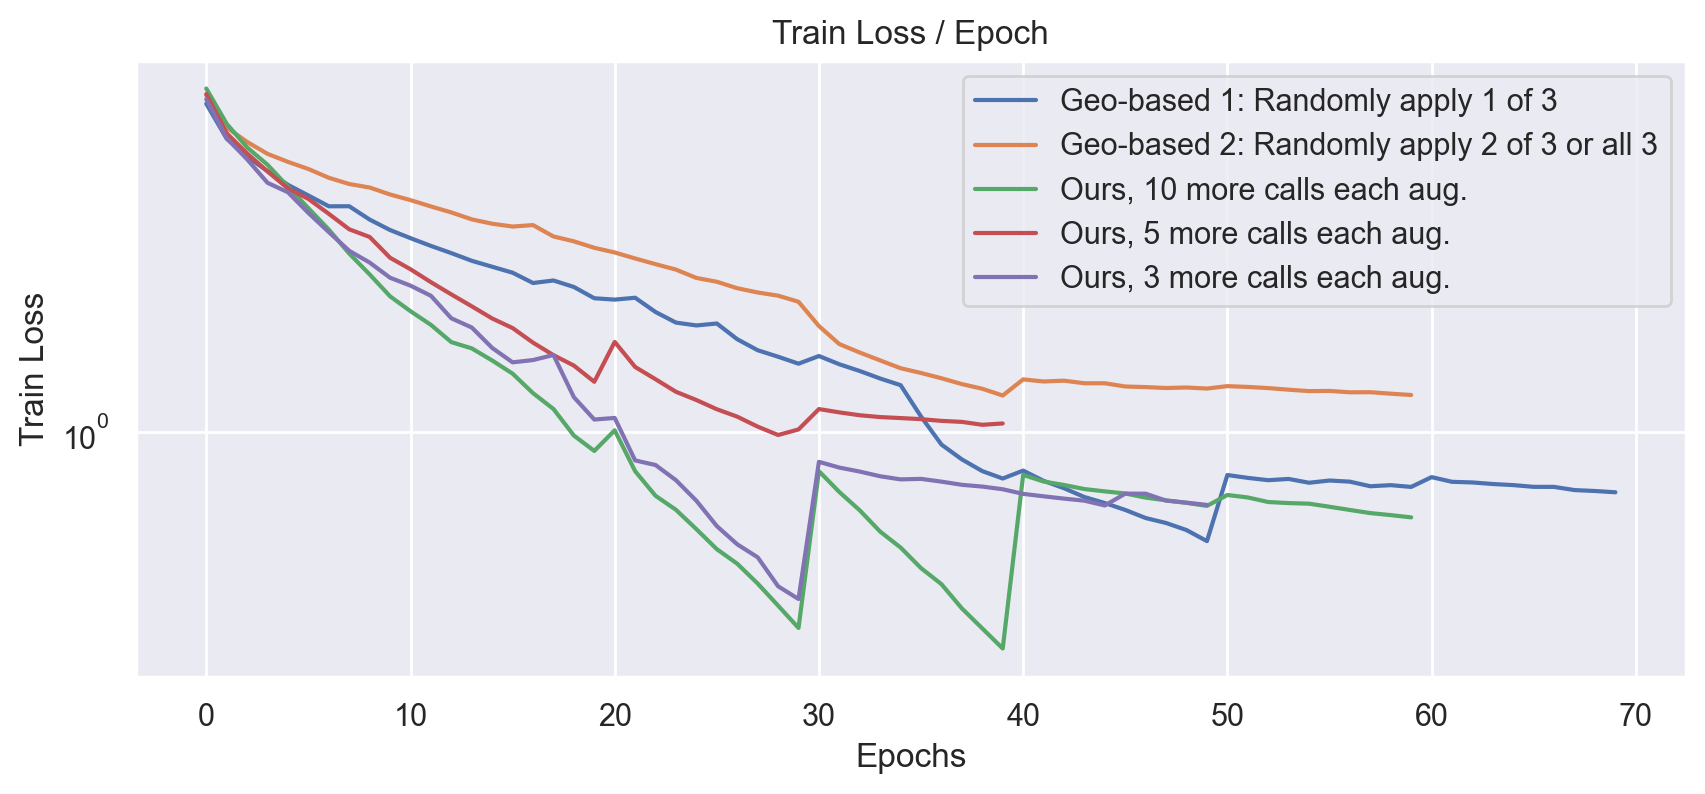

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

epochs = [i for i in range(len(t1))]


fig, ax = plt.subplots( dpi = 200, figsize=(10, 4))
plt.title('Train Loss / Epoch')
ax.plot([i for i in range(len(t1))], [e['train_loss'] for e in t1], label="Geo-based 1: Randomly apply 1 of 3")
ax.plot([i for i in range(len(t2))], [e['train_loss'] for e in t2], label="Geo-based 2: Randomly apply 2 of 3 or all 3")
ax.plot([i for i in range(len(test2))], [e['train_loss'] for e in test2], label="Ours, 10 more calls each aug.")
ax.plot([i for i in range(len(test3))], [e['train_loss'] for e in test3], label="Ours, 5 more calls each aug.")
ax.plot([i for i in range(len(test5))], [e['train_loss'] for e in test5], label="Ours, 3 more calls each aug.")
ax.set_yscale('log')
ax.set_xlabel('Epochs')
ax.set_ylabel('Train Loss')
ax.legend()
plt.show()

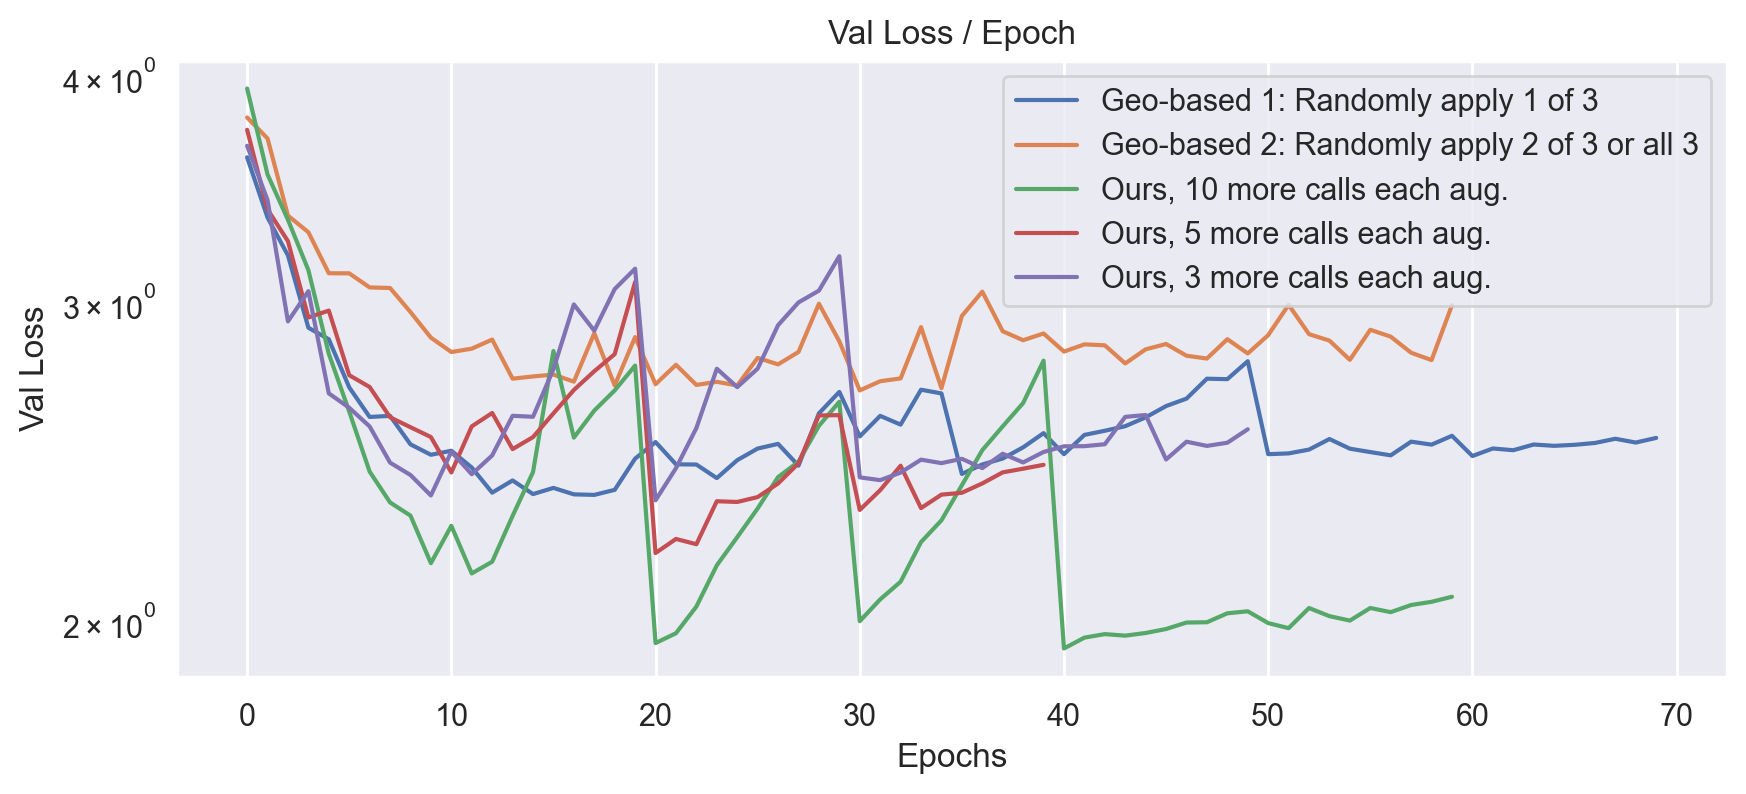

In [23]:
fig, ax = plt.subplots( dpi = 200, figsize=(10, 4))
plt.title('Val Loss / Epoch')
ax.plot([i for i in range(len(t1))], [e['valid_loss'] for e in t1], label="Geo-based 1: Randomly apply 1 of 3")
ax.plot([i for i in range(len(t2))], [e['valid_loss'] for e in t2], label="Geo-based 2: Randomly apply 2 of 3 or all 3")
ax.plot([i for i in range(len(test2))], [e['valid_loss'] for e in test2], label="Ours, 10 more calls each aug.")
ax.plot([i for i in range(len(test3))], [e['valid_loss'] for e in test3], label="Ours, 5 more calls each aug.")
ax.plot([i for i in range(len(test5))], [e['valid_loss'] for e in test5], label="Ours, 3 more calls each aug.")
ax.set_xlabel('Epochs')
ax.set_yscale('log')
ax.set_ylabel('Val Loss')
ax.legend()
plt.show()

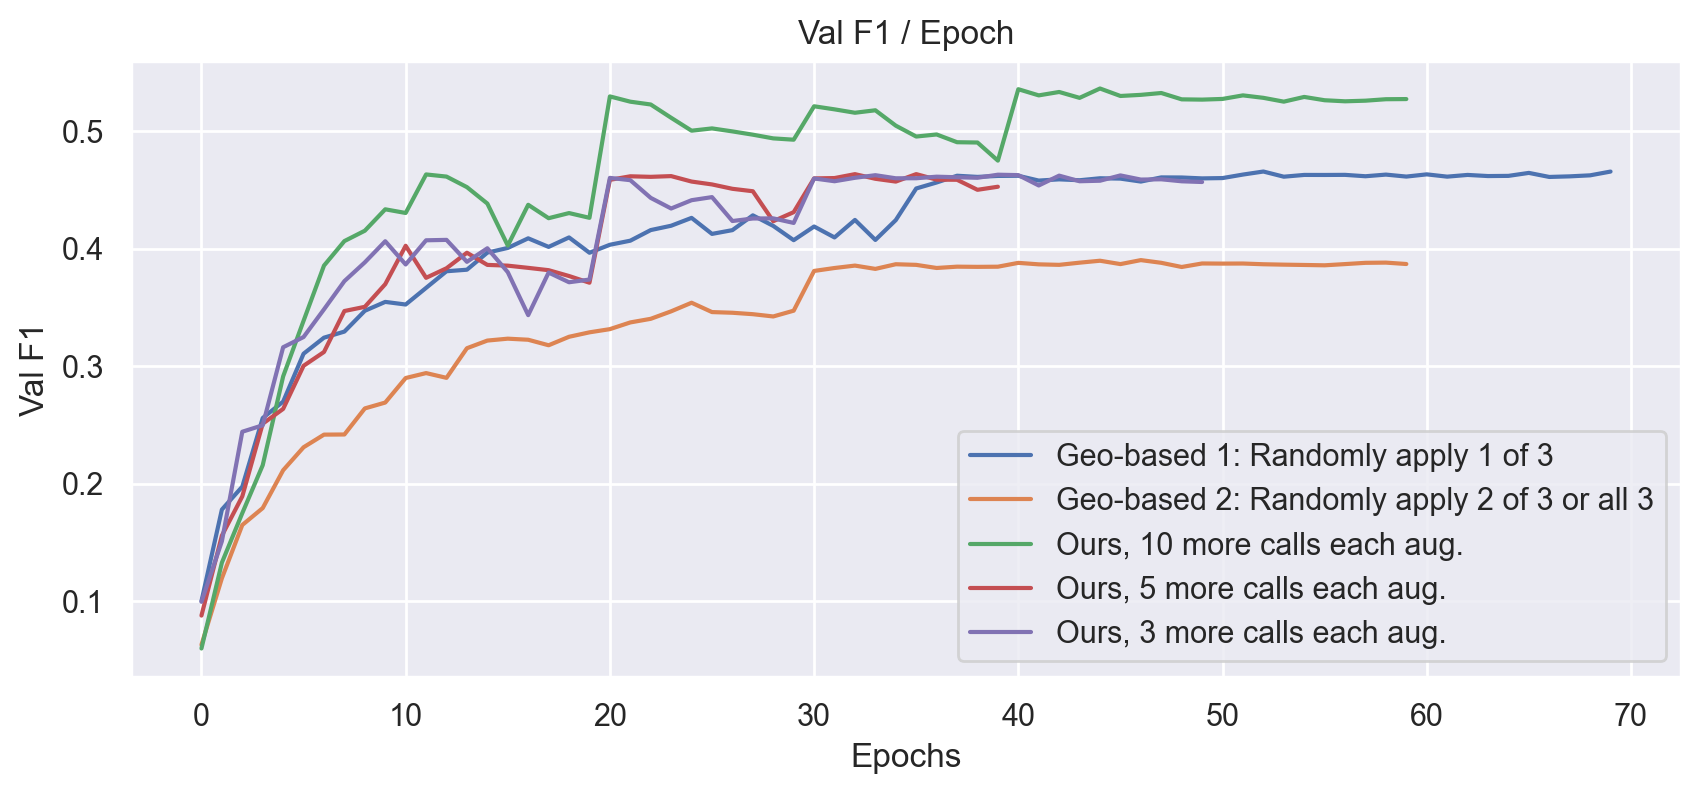

In [21]:
fig, ax = plt.subplots( dpi = 200, figsize=(10, 4))
plt.title('Val F1 / Epoch')
ax.plot([i for i in range(len(t1))], [e['valid_f1'] for e in t1], label="Geo-based 1: Randomly apply 1 of 3")
ax.plot([i for i in range(len(t2))], [e['valid_f1'] for e in t2], label="Geo-based 2: Randomly apply 2 of 3 or all 3")
ax.plot([i for i in range(len(test2))], [e['valid_f1'] for e in test2], label="Ours, 10 more calls each aug.")
ax.plot([i for i in range(len(test3))], [e['valid_f1'] for e in test3], label="Ours, 5 more calls each aug.")
ax.plot([i for i in range(len(test5))], [e['valid_f1'] for e in test5], label="Ours, 3 more calls each aug.")
ax.set_xlabel('Epochs')
ax.set_ylabel('Val F1')
ax.legend()
plt.show()

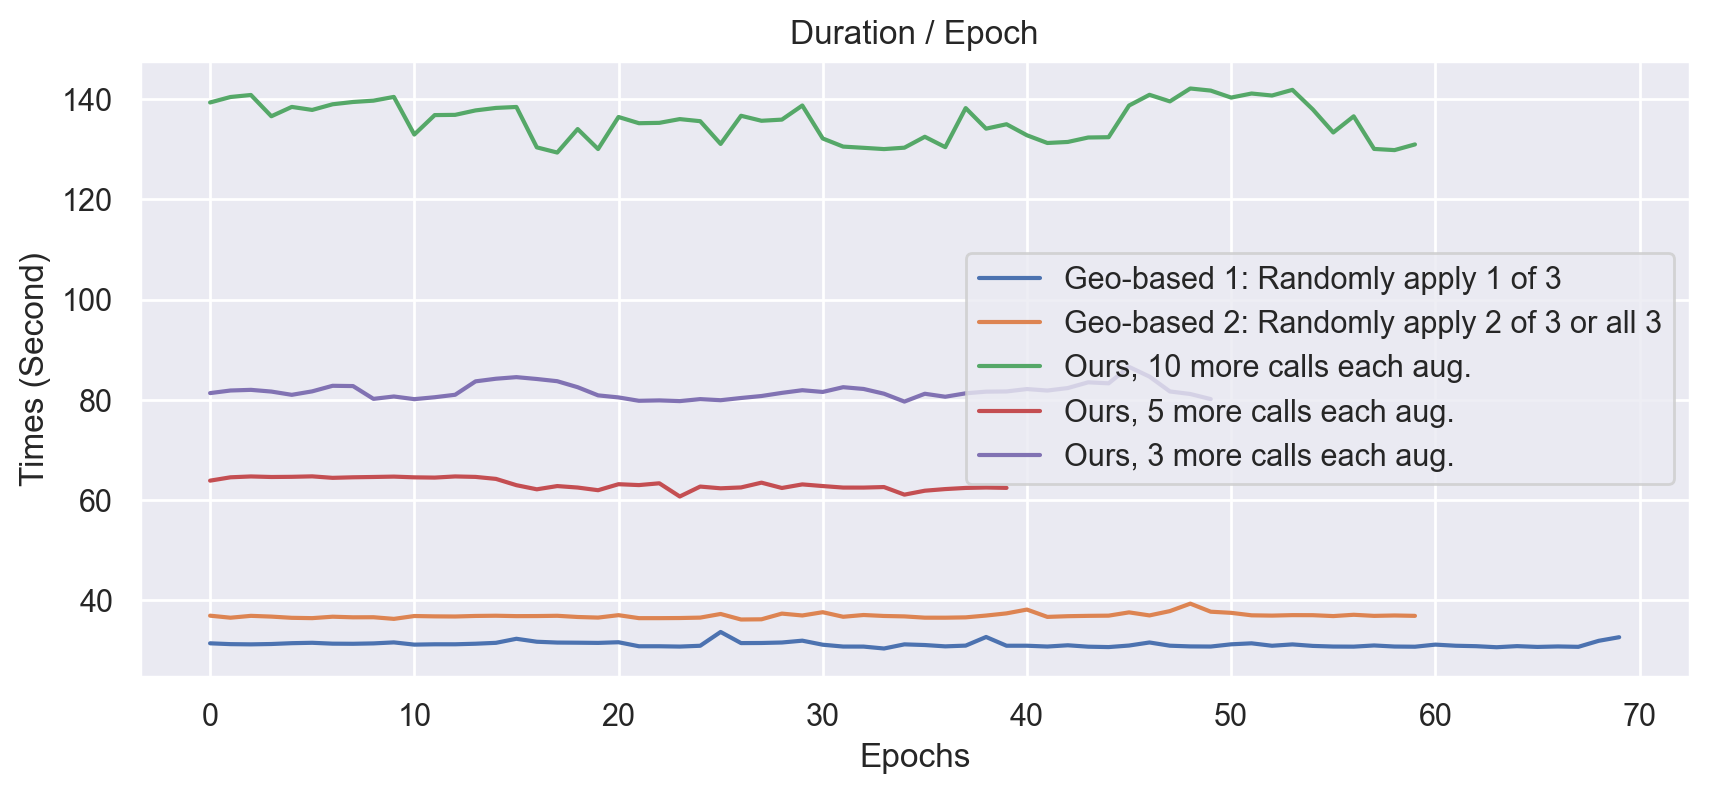

In [25]:
fig, ax = plt.subplots( dpi = 200, figsize=(10, 4))
plt.title('Duration / Epoch')
ax.plot([i for i in range(len(t1))], [e['dur'] for e in t1], label="Geo-based 1: Randomly apply 1 of 3")
ax.plot([i for i in range(len(t2))], [e['dur'] for e in t2], label="Geo-based 2: Randomly apply 2 of 3 or all 3")
ax.plot([i for i in range(len(test2))], [e['dur'] for e in test2], label="Ours, 10 more calls each aug.")
ax.plot([i for i in range(len(test3))], [e['dur'] for e in test3], label="Ours, 5 more calls each aug.")
ax.plot([i for i in range(len(test5))], [e['dur'] for e in test5], label="Ours, 3 more calls each aug.")
ax.set_xlabel('Epochs')
ax.set_ylabel('Times (Second)')
ax.legend()
plt.show()

# a = epoches, b = batches
# O(a * b)
# O(a * b * 10)
# O(a * b * 5)
# O(a * b * 3)